## Project New York City Taxi Fare Prediction

In [89]:
#!pip install xgboost


### Loading libraries

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [74]:
data=pd.read_csv("/home/pandit/DataScience/CodingNest/Projects/Regression/New York/train.csv",nrows = 5_00_000,parse_dates=["pickup_datetime"])
data.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [75]:
data.head()
print(data.columns)
print(data.shape)

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')
(500000, 8)


#### Data Wrangling
1. Identify and handling missing values-replace it with its mean -drop the rows/columns
2. Find Outliers
3. data formating(Incorrect datatype)
4. Feature Scaling/Normlization

In [76]:
data.head(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [77]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000
mean,11.358361,-72.519958,39.920276,-72.522435,39.916526,1.683428
std,9.916617,11.856831,8.073475,11.797362,7.391002,1.307395
min,-44.900000,-2986.242495,-3116.285383,-3383.296608,-2559.748913,0.000000
25%,6.000000,-73.992047,40.734917,-73.991382,40.734057,1.000000
50%,8.500000,-73.981785,40.752670,-73.980126,40.753152,1.000000
75%,12.500000,-73.967117,40.767076,-73.963572,40.768135,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


#### Fare amount column
Found negative value of fare amount. Fare never be negative lets drop
those rows which are having negative fare amount and also remove outliers.

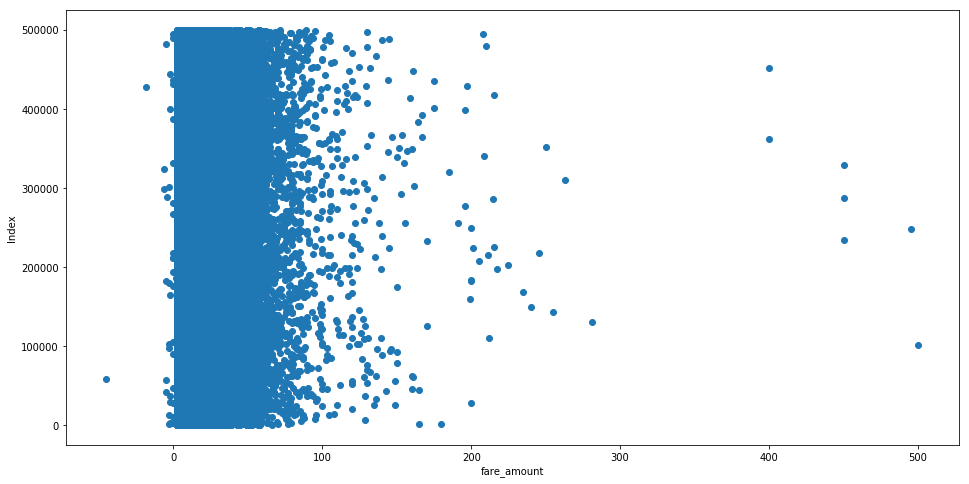

In [78]:
plt.figure(figsize=(16,8))
plt.scatter(x=data.fare_amount,y=data.index)
plt.ylabel('Index')
plt.xlabel('fare_amount')
plt.show()

In [79]:
data['fare_amount'][(data.fare_amount<0) | (data.fare_amount>=300)].count()

28

In [80]:
data.shape

(500000, 8)

In [81]:
data=data.drop(data[(data.fare_amount<0) | (data.fare_amount>=300)].index,axis=0)

In [82]:
data.fare_amount.isnull().sum()

0

In [83]:
data.shape

(499972, 8)

In [84]:
data.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
dtype: int64

#### Longitude and Latitude

Found NaN values in columns dropoff_longitude and dropoff_latitude
We found NaN values in columns 
i) dropoff_longitude and 
ii) dropoff_latitude which is not much as comapared to our dataset. 
So we will replace it by mean values

#### Changed the idea

In [85]:
print(data.pickup_latitude.head(5))
print(data.dropoff_latitude.head(5))

0    40.721319
1    40.711303
2    40.761270
3    40.733143
4    40.768008
Name: pickup_latitude, dtype: float64
0    40.712278
1    40.782004
2    40.750562
3    40.758092
4    40.783762
Name: dropoff_latitude, dtype: float64


Check test data latitude and longitude range for New your City

In [86]:
test_data=pd.read_csv('/home/pandit/DataScience/CodingNest/Projects/Regression/New York/test.csv')
test_data.head(5)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [87]:
test_data.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

Longitude max and min(test data)

In [88]:
lon_min=min(test_data.pickup_longitude.min(),test_data.dropoff_longitude.min())
lon_max=max(test_data.pickup_longitude.max(),test_data.dropoff_longitude.max())
print(lon_min,',',lon_max)

-74.263242 , -72.986532


Latitude max and min(test data)

In [89]:
lat_min=min(test_data.pickup_latitude.min(),test_data.dropoff_latitude.min())
lat_max=max(test_data.pickup_latitude.max(),test_data.dropoff_latitude.max())
print(lat_min,',',lat_max)

40.568973 , 41.709555


Apply the same range on train data and drop remaining
#### pickup_latitude & dropoff_latitude must be beetwee lat_max and lat_min

In [90]:
data[(data.pickup_latitude<lat_min)|(data.pickup_latitude>lat_max)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
11,2012-12-24 11:24:00.00000098,5.5,2012-12-24 11:24:00+00:00,0.000000,0.000000,0.000000,0.000000,3
15,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00+00:00,0.000000,0.000000,0.000000,0.000000,1
26,2011-02-07 20:01:00.000000114,6.5,2011-02-07 20:01:00+00:00,0.000000,0.000000,0.000000,0.000000,1
124,2013-01-17 17:22:00.00000043,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2
192,2010-09-05 17:08:00.00000092,3.7,2010-09-05 17:08:00+00:00,0.000000,0.000000,0.000000,0.000000,5
233,2011-07-24 01:14:35.0000002,8.5,2011-07-24 01:14:35+00:00,0.000000,0.000000,0.000000,0.000000,2
273,2009-10-30 18:13:00.00000021,8.1,2009-10-30 18:13:00+00:00,0.000000,0.000000,0.000000,0.000000,4
357,2013-07-04 16:41:27.0000002,8.5,2013-07-04 16:41:27+00:00,0.000000,0.000000,0.000000,0.000000,1
376,2014-05-29 05:57:22.0000001,2.5,2014-05-29 05:57:22+00:00,0.000000,0.000000,0.000000,0.000000,1
387,2012-11-15 08:39:00.00000095,13.0,2012-11-15 08:39:00+00:00,0.000000,0.000000,0.000000,0.000000,1


In [91]:
data.drop(data[(data.pickup_latitude<lat_min)|(data.pickup_latitude>lat_max)].index,axis=0,inplace=True)

In [92]:
data[(data.dropoff_latitude<lat_min)|(data.dropoff_latitude>lat_max)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1260,2011-03-10 20:25:00.00000049,5.70,2011-03-10 20:25:00+00:00,-73.973907,40.754743,0.000000,0.000000,2
4278,2015-04-07 23:33:02.0000005,7.00,2015-04-07 23:33:02+00:00,-73.972702,40.757423,0.000000,0.000000,1
4291,2012-05-07 15:49:00.000000123,45.00,2012-05-07 15:49:00+00:00,-74.031268,40.703843,-73.969337,40.551710,1
4567,2010-01-07 11:52:00.00000093,10.10,2010-01-07 11:52:00+00:00,-73.989795,40.715727,-73.996540,40.484335,1
7014,2011-06-18 04:03:00.00000083,4.50,2011-06-18 04:03:00+00:00,-73.988980,40.721697,-74.001073,0.728087,3
8647,2014-03-27 18:01:00.00000071,21.50,2014-03-27 18:01:00+00:00,-74.001808,40.750782,0.000000,0.000000,1
10000,2012-03-08 20:11:00.000000274,56.50,2012-03-08 20:11:00+00:00,-74.000777,40.728885,-74.138033,40.550097,5
10458,2013-02-23 20:58:00.000000150,2.50,2013-02-23 20:58:00+00:00,-73.979678,40.765962,0.000000,0.000000,1
10488,2012-03-15 00:30:07.0000001,5.30,2012-03-15 00:30:07+00:00,-73.978103,40.751798,0.000000,0.000000,1
10672,2015-04-30 15:34:46.0000002,18.00,2015-04-30 15:34:46+00:00,-73.979355,40.753902,0.000000,0.000000,1


In [93]:
data.drop(data[(data.dropoff_latitude<lat_min)|(data.dropoff_latitude>lat_max)].index,axis=0,inplace=True)

**pickup_longitude and dropoff_longitude must be between lon_min and lon_max

In [94]:
print(data.pickup_longitude.tail(5))
print(data.dropoff_longitude.tail(5))

499995   -73.978775
499996   -74.002932
499997   -73.983885
499998   -73.974617
499999   -73.986743
Name: pickup_longitude, dtype: float64
499995   -73.966072
499996   -74.009442
499997   -73.896482
499998   -73.970184
499999   -73.982768
Name: dropoff_longitude, dtype: float64


In [95]:
data.pickup_longitude.abs().head()

0    73.844311
1    74.016048
2    73.982738
3    73.987130
4    73.968095
Name: pickup_longitude, dtype: float64

In [96]:
data[(data.pickup_longitude<lon_min)|(data.pickup_longitude>lon_max)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
649,2009-09-19 10:34:41.0000002,66.30,2009-09-19 10:34:41+00:00,-74.438233,40.993260,-74.185996,40.693874,2
16689,2010-09-12 01:11:00.00000068,7.30,2010-09-12 01:11:00+00:00,-72.856968,40.589230,-72.854940,40.589095,2
17825,2012-06-05 09:11:00.000000114,16.50,2012-06-05 09:11:00+00:00,0.000000,40.744977,-73.988625,40.737310,1
24111,2011-03-20 13:15:52.0000001,13.70,2011-03-20 13:15:52+00:00,-75.414728,40.729875,-75.354559,40.682967,2
25818,2012-06-02 09:06:00.00000082,6.90,2012-06-02 09:06:00+00:00,-74.700000,40.706250,-74.014482,40.714747,3
30746,2010-05-31 22:25:00.00000075,5.30,2010-05-31 22:25:00+00:00,-74.312932,40.919507,-74.308235,40.919385,2
30979,2010-10-16 23:57:00.000000250,17.30,2010-10-16 23:57:00+00:00,-74.711648,40.747667,-74.755480,40.669957,3
41229,2015-05-08 02:32:29.0000001,65.00,2015-05-08 02:32:29+00:00,-74.291595,40.689968,-74.291611,40.689945,1
45733,2010-10-20 11:24:00.000000176,8.10,2010-10-20 11:24:00+00:00,-74.290833,40.643103,-74.294613,40.641022,1
49003,2011-02-23 15:54:03.0000003,28.10,2011-02-23 15:54:03+00:00,-75.423848,40.773949,-73.972680,40.755742,1


In [97]:
data.drop(data[(data.pickup_longitude<lon_min)|(data.pickup_longitude>lon_max)].index,axis=0,inplace=True)

In [98]:
# Dropoff
data[(data.dropoff_longitude<lon_min)|(data.dropoff_longitude>lon_max)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2280,2011-08-29 08:24:00.000000107,8.9,2011-08-29 08:24:00+00:00,-73.936667,40.757815,0.000000,40.757815,1
5864,2012-03-04 01:35:00.000000173,8.5,2012-03-04 01:35:00+00:00,-73.995030,40.744945,-7.986640,40.729937,1
15749,2012-05-12 17:58:00.000000118,10.9,2012-05-12 17:58:00+00:00,-73.967183,40.772403,0.000000,40.740677,1
24958,2012-01-02 18:32:00.000000119,10.9,2012-01-02 18:32:00+00:00,-73.991677,40.735017,-3.959442,40.769480,1
34448,2012-03-18 21:23:00.000000128,11.7,2012-03-18 21:23:00+00:00,-73.993487,40.757247,-0.116667,40.719212,2
36910,2012-03-15 16:56:00.00000069,6.1,2012-03-15 16:56:00+00:00,-73.977862,40.773735,-0.116667,40.765042,2
41500,2010-10-17 03:26:00.000000121,14.9,2010-10-17 03:26:00+00:00,-73.986380,40.722407,0.000000,40.699227,1
47520,2011-06-13 13:40:00.00000065,49.8,2011-06-13 13:40:00+00:00,-73.870198,40.731632,-74.302143,41.349023,1
55784,2012-07-29 16:19:00.000000101,10.1,2012-07-29 16:19:00+00:00,-73.993518,40.762332,0.000000,40.794707,1
62518,2012-07-02 14:49:00.00000015,6.5,2012-07-02 14:49:00+00:00,-73.957250,40.779930,-7.949150,40.794147,1


In [99]:
data.drop(data[(data.dropoff_longitude<lon_min)|(data.dropoff_longitude>lon_max)].index,axis=0,inplace=True)

Let's see NaN values now from both dropoff_longitude and dropoff_latitude

In [100]:
data.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    4
dropoff_latitude     4
passenger_count      0
dtype: int64

In [101]:
data[data.dropoff_longitude.isnull()==True].head(1)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
120227,2012-12-11 12:57:00.00000013,12.5,2012-12-11 12:57:00+00:00,-73.99276,40.743098,NaN,NaN,0


In [102]:
data.drop(data[data.dropoff_longitude.isnull()==True].index,axis=0,inplace=True)


In [103]:
data.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

passenger_count column

In [104]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,489361.000000,489361.000000,489361.000000,489361.000000,489361.000000,489361.000000
mean,11.326253,-73.975094,40.751077,-73.974105,40.751472,1.683937
std,9.638770,0.038381,0.029469,0.037651,0.032590,1.307578
min,0.000000,-74.262970,40.569414,-74.255235,40.569414,0.000000
25%,6.000000,-73.992258,40.736567,-73.991562,40.735630,1.000000
50%,8.500000,-73.982077,40.753395,-73.980575,40.753891,1.000000
75%,12.500000,-73.968333,40.767489,-73.965263,40.768422,2.000000
max,281.050000,-73.085745,41.650000,-73.085764,41.543217,6.000000


Outliers: Here we can see min passenger count:0.000000e+00=0 and max of passenger count:2.080000e+02=208(Outlier).

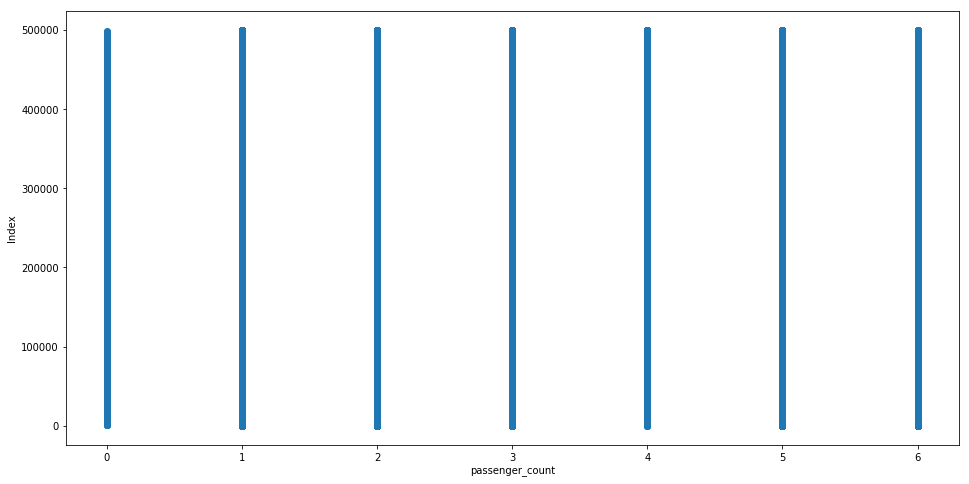

In [105]:
plt.figure(figsize=(16,8))
plt.scatter(x=data.passenger_count,y=data.index)
plt.ylabel('Index')
plt.xlabel('passenger_count')
plt.show()

In [106]:
data['passenger_count'][data.passenger_count==0].count()

1754

In [107]:
print(data.shape)
data.drop(data[data.passenger_count==0].index,axis=0,inplace=True)
print(data.shape)

(489361, 8)
(487607, 8)


Now,let's drop Outliers

In [108]:
print(data.shape)
data.drop(data[data.passenger_count>8].index,axis=0,inplace=True)
print(data.shape)

(487607, 8)
(487607, 8)


Cleaning done...
#### Type conversion (data formating):pickup_datetime

In [109]:
data.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

observed type of column pickup_datetime is an object . will convert it to datetime format

In [110]:
data['pickup_datetime'].head(1)

0   2009-06-15 17:26:21+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

Problem faced:to_datetime-too slow

In [111]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'],infer_datetime_format=True)

In [112]:
data['pickup_datetime'].head(1)

0   2009-06-15 17:26:21+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

split the datetime

In [113]:
data['year'] = data['pickup_datetime'].dt.year
data['Month'] = data['pickup_datetime'].dt.month
data['Date'] = data['pickup_datetime'].dt.day
data['Day of Week'] = data['pickup_datetime'].dt.dayofweek
data['Hour'] = data['pickup_datetime'].dt.hour
data['Minute'] = data['pickup_datetime'].dt.minute

#### Distance
Calculate the distance based on logitude and latitude

In [114]:

from math import radians, cos, sin, asin, sqrt
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
# 1min

In [115]:
data['distance']=data[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [116]:
data['distance'].head(5)

0    1.030764
1    8.450134
2    1.389525
3    2.799270
4    1.999157
Name: distance, dtype: float64

In [117]:
#Analyze column distance and drop the rows
data[data.distance==0].shape

(5202, 15)

In [118]:
print(data.shape)
data.drop(data[data.distance==0].index,axis=0,inplace=True)
print(data.shape)

(487607, 15)
(482405, 15)


#### Exploratory Data Analysis
##### 1)Check the pickup date and time effect the fare or not

Text(0, 0.5, 'Fare')

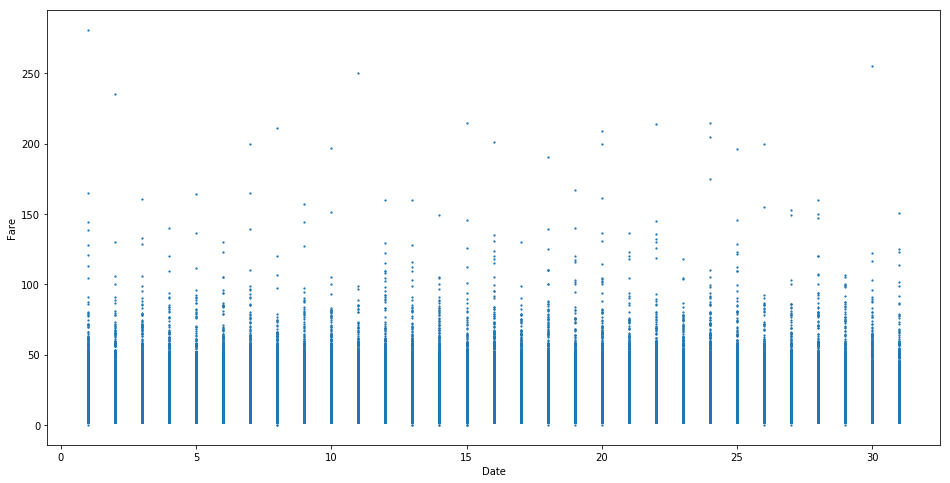

In [119]:
plt.figure(figsize=(16,8))
plt.scatter(x=data['Date'],y=data['fare_amount'],s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare')

The fares through the month mostly seem uniform

Text(0, 0.5, 'Frequency')

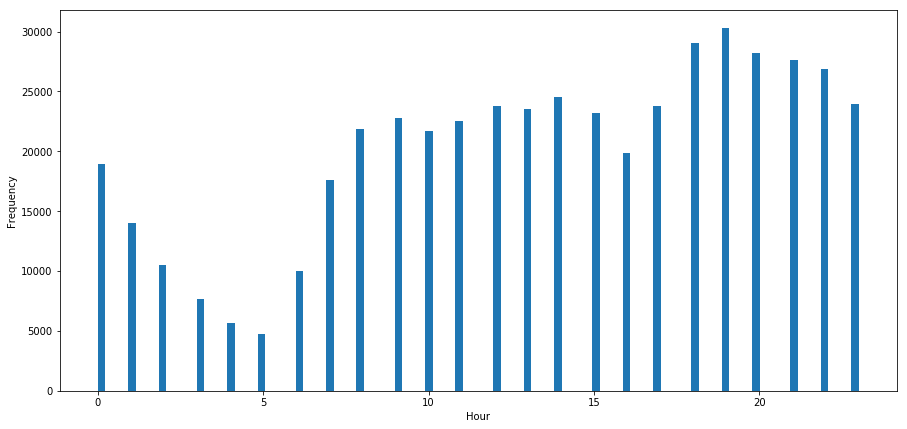

In [120]:
plt.figure(figsize=(15,7))
plt.hist(data['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')


The time of day definitely plays an important role. The frequency of cab rides seem to be the lowest at 5AM

Text(0, 0.5, 'Fare')

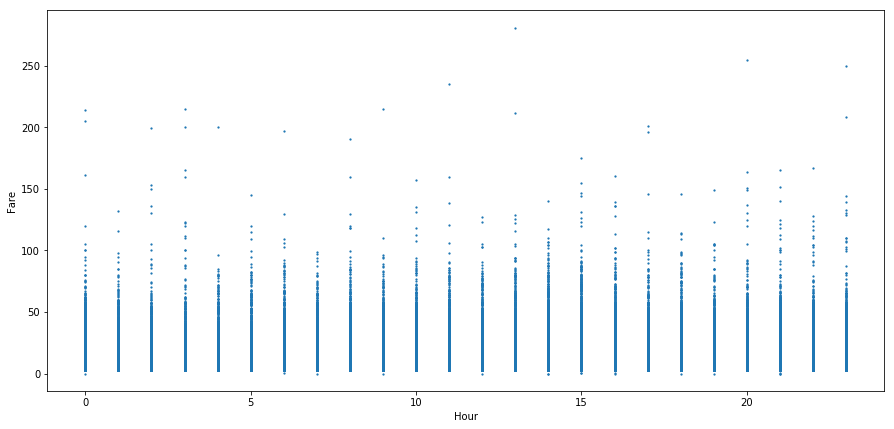

In [121]:
plt.figure(figsize=(15,7))
plt.scatter(x=data['Hour'], y=data['fare_amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')

#### 2)number of passengers vs fare

Text(0, 0.5, 'Frequency')

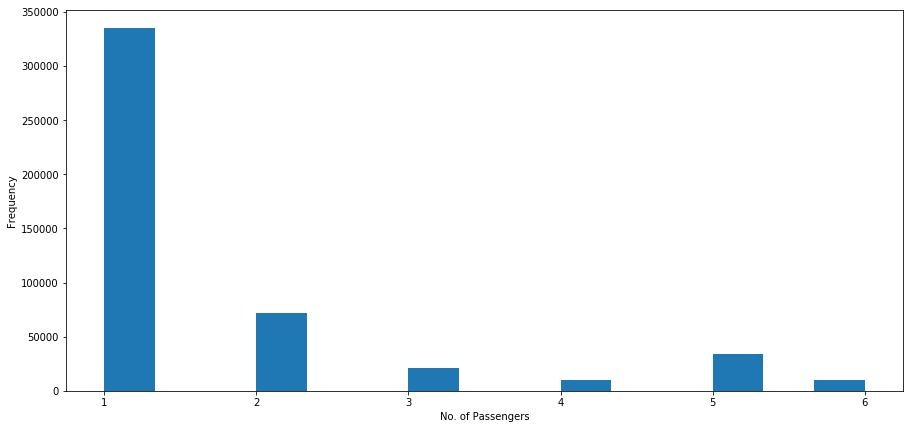

In [122]:
plt.figure(figsize=(15,7))
plt.hist(data['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

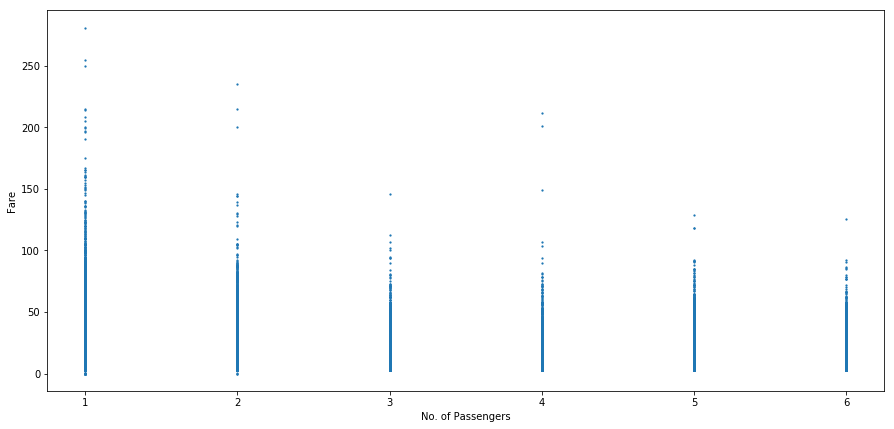

In [123]:
plt.figure(figsize=(15,7))
plt.scatter(x=data['passenger_count'], y=data['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')


single passengers are the most frequent travellers, and the highest fare also seems to come from cabs which carry just 1 passenger.

#### 3)Does the day of the week affect the fare?

Text(0, 0.5, 'Frequency')

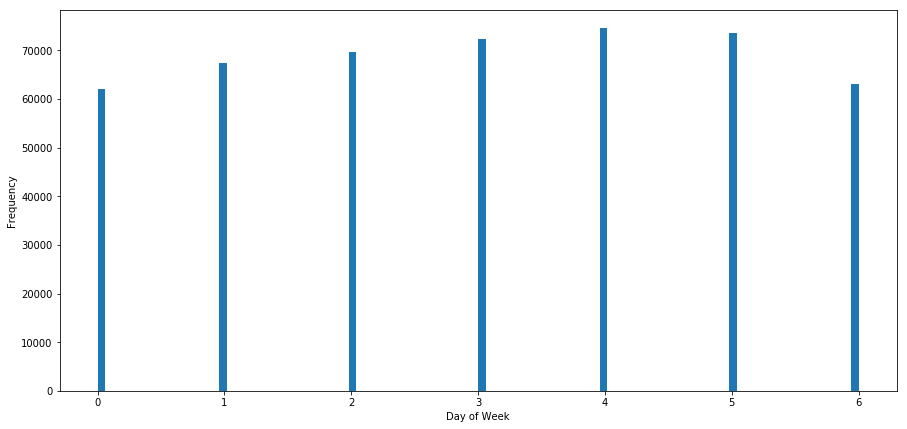

In [124]:
plt.figure(figsize=(15,7))
plt.hist(data['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
#0 means Saturday


day of the week doesn't seem to have the effect on the number of cab rides

#### Test Data

In [125]:
test_data=pd.read_csv('/home/pandit/DataScience/CodingNest/Projects/Regression/New York/test.csv')
test_data.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [126]:
test_data.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

Convert key and pickup_datetime to correctt format

In [127]:
test_data['key']=pd.to_datetime(test_data['key'], infer_datetime_format=True)
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'], infer_datetime_format=True)

In [128]:
test_data.dtypes

key                  datetime64[ns]
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [129]:
test_data['year'] = test_data['pickup_datetime'].dt.year
test_data['Month'] = test_data['pickup_datetime'].dt.month
test_data['Date'] = test_data['pickup_datetime'].dt.day
test_data['Day of Week'] = test_data['pickup_datetime'].dt.dayofweek
test_data['Hour'] = test_data['pickup_datetime'].dt.hour
test_data['Minute'] = test_data['pickup_datetime'].dt.minute

In [130]:
test_data.head(3)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day of Week,Hour,Minute
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53


In [131]:
test_data.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day of Week          0
Hour                 0
Minute               0
dtype: int64

In [132]:
from math import radians, cos, sin, asin, sqrt,atan2
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
# 1min

In [133]:
test_data['distance']=test_data[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [134]:
test_data['distance'].describe()

count    9914.000000
mean        3.435371
std         3.972374
min         0.000000
25%         1.298277
50%         2.217412
75%         4.045302
max        99.996040
Name: distance, dtype: float64

In [135]:
test_data.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'Month', 'Date', 'Day of Week', 'Hour', 'Minute', 'distance'],
      dtype='object')

#### Machine Learning Algorithm

Train Data

In [136]:
data.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
year                               int64
Month                              int64
Date                               int64
Day of Week                        int64
Hour                               int64
Minute                             int64
distance                         float64
dtype: object

In [137]:
#drop pickup_datetime as we can't use directly in our model 
print(data.shape)
data=data.drop('pickup_datetime',axis=1)
print(data.shape)

(482405, 15)
(482405, 14)


In [138]:
data.dtypes

key                   object
fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
year                   int64
Month                  int64
Date                   int64
Day of Week            int64
Hour                   int64
Minute                 int64
distance             float64
dtype: object

In [139]:
data.iloc[:,:].head(1)

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day of Week,Hour,Minute,distance
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.84161,40.712278,1,2009,6,15,0,17,26,1.030764


In [146]:
X=data.drop("fare_amount",axis=1)
y=data.iloc[:,0]

In [147]:
X.shape

(482405, 13)

In [148]:
y.shape

(482405,)

### To Check Accuracy

In [149]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=0)

In [150]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(train_X,train_y)
y_pred=regressor.predict(test_X)

ValueError: could not convert string to float: '2009-02-24 20:36:00.00000092'

In [84]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Mean absolute Error:{0}".format(mean_absolute_error(test_y,y_pred)))
print("Root mean squared Error:{0}".format(mean_squared_error(test_y,y_pred)))

NameError: name 'y_pred' is not defined

In [86]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y =train_test_split(X,y,test_size=0.2,random_state=0)

MemoryError: 

In [ ]:
import xgboost
Regression_xgbooost =xgboost.XGBRegressor(n_estimators=300,max_depth=15,max_leaves=9,random_state=0)
Regression_xgbooost.fit(train_X,train_y)
y_pred=Regression_xgbooost.predict(val_X)

In [87]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(val_y,y_pred))

NameError: name 'val_y' is not defined